In [30]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import resample

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [109]:
rasp = pd.read_csv('./dinamico_csv/20kmph/rasp.csv',names=['Load', 'Air_Spd'], sep=';')
eagle = pd.read_csv('./dinamico_csv/20kmph/eagle.csv',names=['Gnd_Spd', 'Lat', 'Long', 'Gnd_Spdmph'], sep=';')

,Load,Air_Spd
0,1504.075053,10.00
1,1974.979761,9.00
2,2521.285123,10.00
3,2647.723983,11.00
4,2787.829084,29.91


In [117]:
load = rasp['Load'].values.reshape(-1,1)
air_spd = rasp['Air_Spd'].values.reshape(-1,1)
gnd_spd = eagle['Gnd_Spd'].values.reshape(-1,1)
gnd_spd_rs = resample(gnd_spd,len(air_spd))

(198, 1)

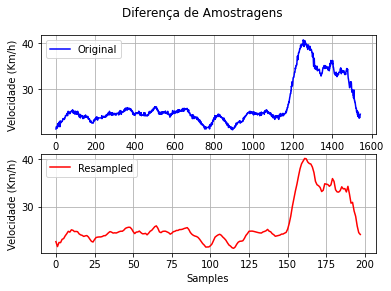

In [118]:
x1 = np.arange(0,1542)
fig0, (ax1, ax2) = plt.subplots(2)
fig0.suptitle('Diferença de Amostragens')
ax1.plot(x1,gnd_spd, '-b', label='Original')
ax1.set(xlabel='Samples', ylabel='Velocidade (Km/h)')
ax1.legend(loc='upper left')
ax1.grid()

x2 = np.arange(0,198)
ax2.plot(x2,gnd_spd_rs, '-r', label='Resampled')
ax2.set(xlabel='Samples', ylabel='Velocidade (Km/h)')
ax2.legend(loc='upper left')
ax2.grid()


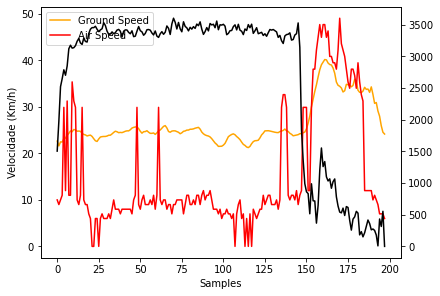

In [121]:
fig1, ax1 = plt.subplots(constrained_layout=True)
ax2 = ax1.twinx()

ax1.plot(x2, gnd_spd_rs, label='Ground Speed', color='orange')
ax1.plot(x2,air_spd,label='Air Speed', color='red')
ax1.set(xlabel='Samples', ylabel='Velocidade (Km/h)')
ax1.legend(loc='upper left')

ax2.plot(x2,load, label='Load', color='black')
